In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [2]:
titanic_data = pd.read_csv("task_2_dataset.csv")
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
#remove missing value here cabin has been removed
titanic_data = titanic_data.drop(columns = 'Cabin' , axis =1)
titanic_data


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [4]:
#replacing null values with mean values
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace = True)

In [5]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [6]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [7]:
#for Fare we use medain
print(titanic_data['Fare'].median())

14.4542


In [8]:
titanic_data['Fare'].fillna(titanic_data['Fare'].median(), inplace = True)

In [9]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [10]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
#how many peoples survived
titanic_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

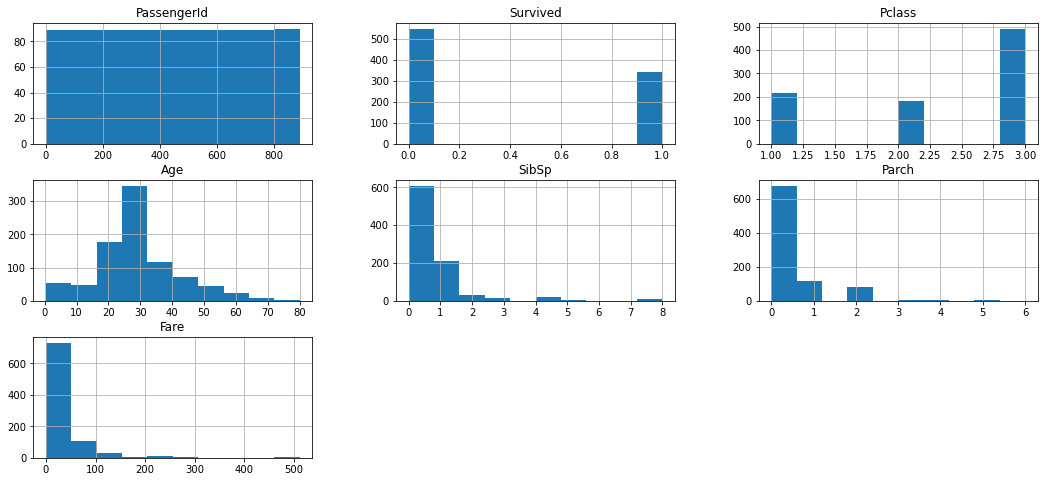

In [12]:
titanic_data.hist(figsize=(18,8))

C:\Users\ARAVINDH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

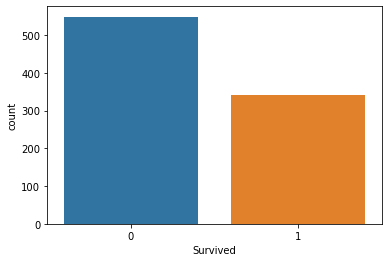

In [13]:
#visualization of survival data
sns.countplot(titanic_data['Survived'])

<AxesSubplot:xlabel='Sex', ylabel='count'>

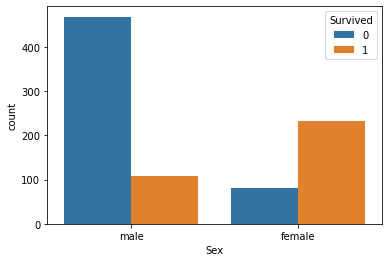

In [14]:
titanic_data['Survived'] = titanic_data['Survived'].astype(str)
sns.countplot(x='Sex',hue = 'Survived', data=titanic_data)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

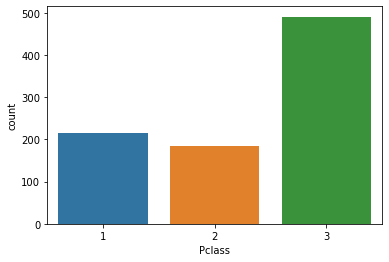

In [15]:
# count plot for pclass
sns.countplot(x = 'Pclass', data= titanic_data)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

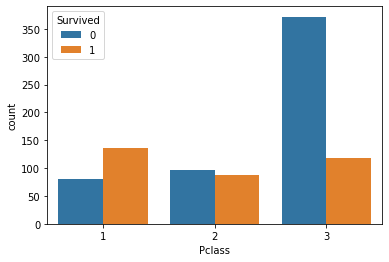

In [16]:
sns.countplot(x='Pclass',hue = 'Survived', data=titanic_data)

In [17]:
# Print the data types of all columns
print(titanic_data.dtypes)

# Select only numeric columns and print their data types to confirm
numeric_data = titanic_data.select_dtypes(include=['number'])
print(numeric_data.dtypes)


PassengerId      int64
Survived        object
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object
PassengerId      int64
Pclass           int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
dtype: object


In [18]:
numeric_data = titanic_data.select_dtypes(include=['number'])

# Calculate correlation matrix
corr_matrix = numeric_data.corr()

# Display the correlation matrix
print(corr_matrix)

             PassengerId    Pclass       Age     SibSp     Parch      Fare
PassengerId     1.000000 -0.035144  0.033207 -0.057527 -0.001652  0.012658
Pclass         -0.035144  1.000000 -0.331339  0.083081  0.018443 -0.549500
Age             0.033207 -0.331339  1.000000 -0.232625 -0.179191  0.091566
SibSp          -0.057527  0.083081 -0.232625  1.000000  0.414838  0.159651
Parch          -0.001652  0.018443 -0.179191  0.414838  1.000000  0.216225
Fare            0.012658 -0.549500  0.091566  0.159651  0.216225  1.000000


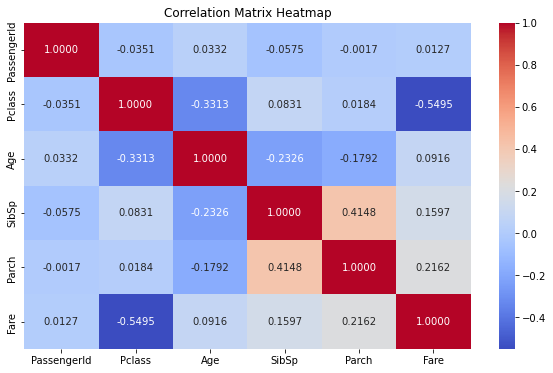

In [19]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt='.4f', cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

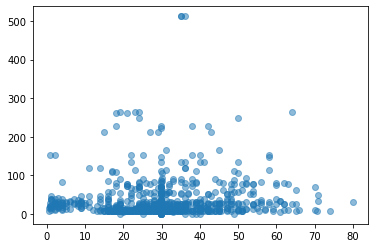

In [20]:
plt.scatter(titanic_data['Age'], titanic_data['Fare'], alpha=0.5)

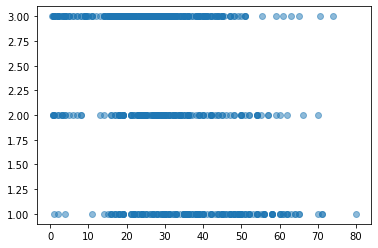

In [21]:
plt.scatter(titanic_data['Age'], titanic_data['Pclass'], alpha=0.5)

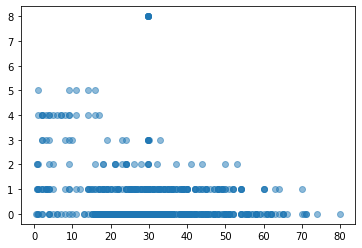

In [22]:
plt.scatter(titanic_data['Age'], titanic_data['SibSp'], alpha=0.5)

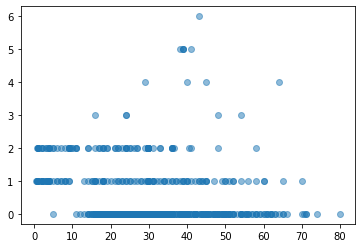

In [23]:
plt.scatter(titanic_data['Age'], titanic_data['Parch'], alpha=0.5)

In [24]:
titanic_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [25]:
titanic_data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [26]:
titanic_data.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}})

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,1.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,0.0
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,0.0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.000000,0,0,211536,13.0000,0.0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,112053,30.0000,0.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,1,2,W./C. 6607,23.4500,0.0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,111369,30.0000,1.0


In [27]:
X = titanic_data.drop(columns = ['PassengerId','Name','Ticket','Survived'],axis = 1)
Y = titanic_data['Survived']

In [28]:
X = titanic_data.drop(columns=['PassengerId','Name','Ticket','Survived'],axis = 1)
Y = titanic_data['Survived']

In [29]:
X = pd.get_dummies(X, drop_first=True)

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [31]:
print(X)


     Pclass        Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  \
0         3  22.000000      1      0   7.2500         1           0   
1         1  38.000000      1      0  71.2833         0           0   
2         3  26.000000      0      0   7.9250         0           0   
3         1  35.000000      1      0  53.1000         0           0   
4         3  35.000000      0      0   8.0500         1           0   
..      ...        ...    ...    ...      ...       ...         ...   
886       2  27.000000      0      0  13.0000         1           0   
887       1  19.000000      0      0  30.0000         0           0   
888       3  29.699118      1      2  23.4500         0           0   
889       1  26.000000      0      0  30.0000         1           0   
890       3  32.000000      0      0   7.7500         1           1   

     Embarked_S  
0             1  
1             0  
2             1  
3             1  
4             1  
..          ...  
886           1  
887

In [32]:
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: object


In [33]:
model = LogisticRegression()
model.fit(X_train, Y_train)

C:\Users\ARAVINDH\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [34]:
score = model.score(X_test, Y_test)
print(f'Model accuracy: {score}')

Model accuracy: 0.7821229050279329


In [35]:
titanic_data = pd.get_dummies(titanic_data, columns=['Sex', 'Survived'], drop_first=True)

In [36]:
titanic_data = pd.get_dummies(titanic_data, drop_first=True)


In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)


In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [39]:
print(X.shape,X_train.shape,X_test.shape)

(891, 8) (712, 8) (179, 8)


In [40]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [41]:
model = LogisticRegression()
model
model.fit(X_train, Y_train)

LogisticRegression()

In [42]:
X_train_prediction = model.predict(X_train)
print("Training predictions:", X_train_prediction)

Training predictions: ['0' '0' '0' '0' '0' '1' '0' '0' '0' '0' '1' '0' '0' '0' '0' '1' '1' '1'
 '0' '1' '0' '0' '1' '1' '0' '0' '1' '0' '0' '0' '0' '1' '0' '1' '0' '0'
 '0' '1' '0' '1' '0' '0' '1' '0' '0' '0' '1' '0' '1' '1' '1' '0' '1' '0'
 '1' '0' '1' '1' '1' '1' '0' '0' '1' '0' '1' '0' '0' '0' '0' '0' '0' '1'
 '0' '0' '0' '0' '0' '0' '1' '0' '1' '1' '0' '1' '0' '0' '0' '0' '0' '1'
 '0' '1' '0' '0' '0' '1' '0' '0' '0' '1' '0' '0' '0' '1' '0' '0' '0' '1'
 '0' '0' '0' '0' '0' '1' '1' '0' '0' '0' '0' '0' '1' '1' '0' '0' '0' '0'
 '1' '0' '0' '0' '0' '0' '1' '0' '0' '0' '1' '1' '1' '0' '1' '0' '0' '0'
 '0' '1' '1' '0' '1' '0' '0' '0' '0' '1' '0' '0' '0' '1' '1' '0' '0' '0'
 '0' '0' '0' '0' '0' '1' '0' '0' '0' '1' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '1' '1' '1' '0' '1' '1' '0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '1'
 '1' '1' '0' '1' '0' '1' '1' '0' '0' '0' '1' '0' '1' '1' '1' '1' '1' '1'
 '1' '0' '0' '0' '1' '1' '0' '1' '0' '1' '1' '1' '0' '1' '1' '0' '0' '1'
 '1' '0' '1' '1' '0' '0' '1' 

In [43]:
train_accuracy = accuracy_score(Y_train, X_train_prediction)
print("Training accuracy:", train_accuracy)

Training accuracy: 0.8019662921348315


In [44]:
X_test_prediction = model.predict(X_test)
print("Testing predictions:", X_test_prediction)

Testing predictions: ['0' '0' '0' '1' '1' '1' '1' '0' '1' '1' '0' '0' '0' '0' '0' '1' '0' '1'
 '0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '0' '1' '0' '1' '1' '1' '0' '0'
 '0' '1' '1' '0' '0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '1' '1' '0' '1'
 '0' '1' '0' '1' '1' '1' '0' '1' '1' '0' '0' '1' '0' '0' '0' '1' '1' '1'
 '1' '1' '0' '0' '1' '1' '1' '0' '0' '1' '1' '0' '0' '0' '1' '1' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '0' '1' '0' '0' '0' '1' '0'
 '0' '0' '1' '0' '1' '0' '1' '0' '0' '0' '1' '0' '0' '1' '1' '0' '0' '1'
 '1' '1' '1' '0' '1' '0' '0' '1' '0' '1' '1' '0' '0' '1' '0' '1' '0' '0'
 '0' '1' '0' '0' '1' '0' '0' '0' '0' '1' '0' '0' '0' '1' '1' '1' '0' '0'
 '0' '1' '0' '0' '0' '1' '0' '0' '1' '1' '0' '1' '0' '0' '0' '1' '1']


In [45]:
test_accuracy = accuracy_score(Y_test, X_test_prediction)
print("Testing accuracy:", test_accuracy)

Testing accuracy: 0.8100558659217877


In [46]:
import joblib
joblib.dump(model, 'logistic_regression_model.pkl')

['logistic_regression_model.pkl']

In [47]:
joblib.dump(model, 'titanic_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']